# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

Читаем и выводим на экран данные по датасету

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10281,18,2500000.0,31.2,2015-08-03T00:00:00,1,2.50,5.0,17.40,4,NaN,...,5.5,1.0,поселок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,759.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.00,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
11238,9,4400000.0,90.0,2016-04-26T00:00:00,4,2.80,3.0,70.00,2,NaN,...,15.0,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,155.0
23058,12,4660400.0,40.7,2019-01-24T00:00:00,1,2.77,10.0,16.50,5,NaN,...,11.4,NaN,Санкт-Петербург,39892.0,15176.0,0.0,NaN,0.0,NaN,11.0
12094,13,7225000.0,55.0,2017-05-15T00:00:00,2,NaN,16.0,32.50,4,False,...,10.0,2.0,Санкт-Петербург,32826.0,13990.0,1.0,176.0,1.0,466.0,65.0
13274,11,7790000.0,69.0,2017-04-18T00:00:00,2,NaN,25.0,35.00,2,NaN,...,10.0,1.0,Санкт-Петербург,39653.0,8913.0,0.0,NaN,0.0,NaN,154.0
4006,8,2200000.0,31.6,2017-11-16T00:00:00,1,2.50,17.0,14.10,10,NaN,...,8.1,2.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,132.0
5836,10,3450000.0,31.0,2017-05-18T00:00:00,1,2.50,7.0,17.10,3,NaN,...,5.7,1.0,Санкт-Петербург,42706.0,15209.0,0.0,NaN,0.0,NaN,350.0
22634,18,8900000.0,67.8,2017-12-15T00:00:00,2,3.00,6.0,29.55,5,NaN,...,13.0,NaN,Санкт-Петербург,24842.0,3417.0,3.0,388.0,1.0,970.0,249.0
18615,4,4150000.0,44.2,2019-01-10T00:00:00,2,2.60,9.0,27.60,5,NaN,...,6.7,NaN,Санкт-Петербург,29439.0,12990.0,0.0,NaN,0.0,NaN,4.0


Строим общую гистограмму для всех числовых столбцов таблицы

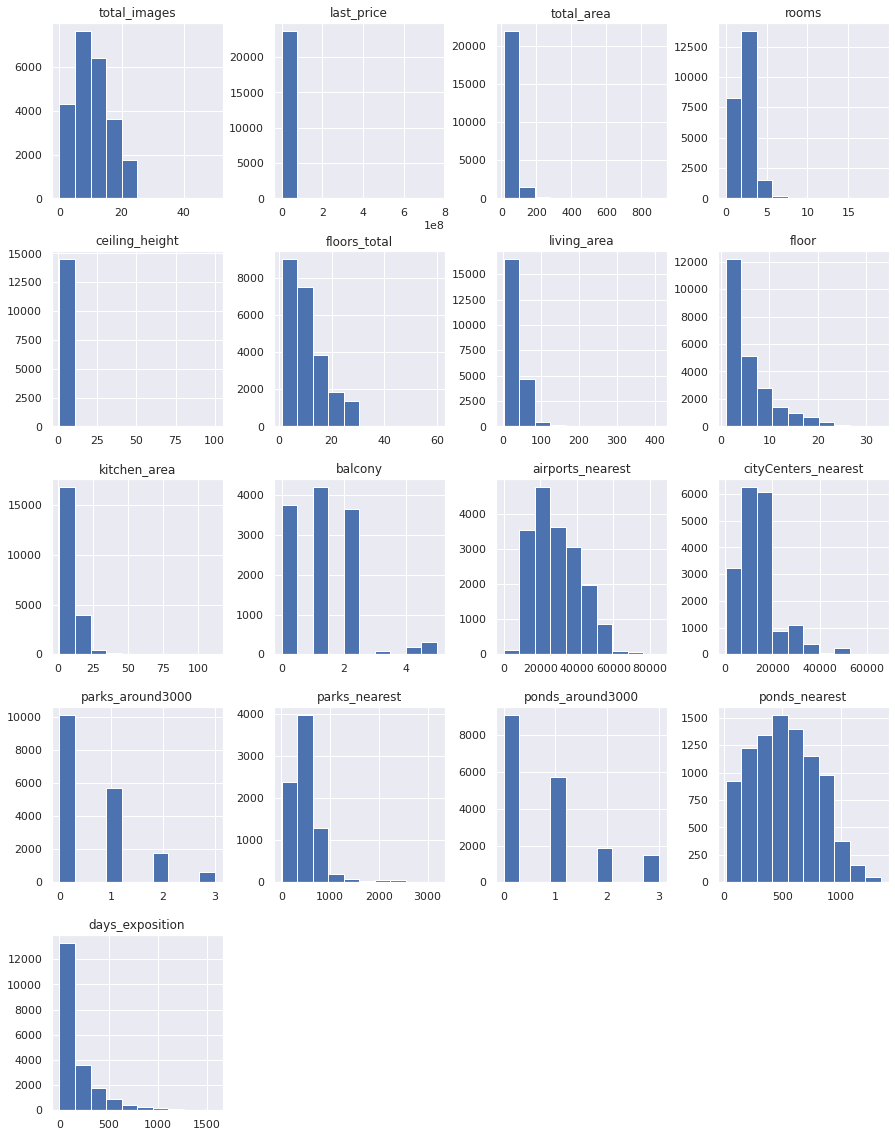

In [3]:
df.hist(figsize=(15, 20))
plt.show()

**Промежуточный вывод по этапу 1:**

Датасет для анализа содержит таблицу, состоящую 23699 строк и 22 столбца:

Заметили следующее:

* last_price в рублях
* first_day_exposition - object - должен быть тип datetime
* ceiling_height - нулевые значения
* floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
* is_apartment - должен быть тип bool + нулевые значения
* living_area - нулевые значения
* kitchen_area - нулевые значения
* balcony - нулевые значения
* locality_name - нулевые значения
* airports_nearest - нулевые значения
* cityCenters_nearest - нулевые значения
* parks_around3000 - тип должен быть int + нулевые значения
* parks_nearest - нулевые значения
* ponds_around3000 - тип должен быть int + нулевые значения
* ponds_nearest - нулевые значения
* days_exposition - тип должен быть int + нулевые значения





### Предобработка данных

**Определение и изучение пропущенных значений**

In [4]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Создадим таблицу с указанием доли пропусков по каждой колонке и отсортируем значения по убыванию доли пропусков

In [5]:
miss_value=pd.DataFrame(df.isna().mean()).reset_index()
miss_value.set_axis(['column_name', 'missing_value'], axis = 'columns', inplace = True)
miss_value.sort_values(by='missing_value', ascending=False).style.format({ 'missing_value': '{:,.2%}'.format})

,column_name,missing_value
9,is_apartment,88.29%
18,parks_nearest,65.91%
20,ponds_nearest,61.56%
13,balcony,48.61%
5,ceiling_height,38.80%
15,airports_nearest,23.38%
16,cityCenters_nearest,23.29%
19,ponds_around3000,23.28%
17,parks_around3000,23.28%
21,days_exposition,13.42%


Пропуски содержатся более чем в половине колонок, будем действовать по следующему сценарию:

* Удалим строки с долей пропусков менее 1 %
* Оставшиеся колонки будем рассматривать поочередно.

**Удаление строк с долей пропусков менее 1%**

In [6]:
df=df.dropna(subset=['locality_name','floors_total'])

**Обработка пропусков в остальных колонках**

Большое количество пропусков в колонке is_apartment (88,29%) вероятнее всего говорит о том, что на этапе ввода данных, значения в этом поле не устанавливали, если объект не являлся апартаментами, и в принципе доля апартаментов в продаже небольшая-апартаменты появились относительно недавно = все пропущенные значения заменим на False

In [7]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [8]:
df['is_apartment']=df['is_apartment'].fillna(False)

Пропуски в колонках parks_nearest и parks_around3000 вероятнее всего вызваны технической ошибкой. Колонки parks_nearest и parks_around3000 должны иметь схожие данные судя по названию. Выведем пустые значения по колонке parks_around3000 и проверим значения в колонке parks_nearest

In [9]:
print(df.loc[df['parks_around3000'].isna()]['parks_nearest'].unique())

[nan]


Т.к. значения отсутствуют в обеих колонках, то заменим пропуски в колонке parks_around3000 на 0

In [10]:
df['parks_around3000']=df['parks_around3000'].fillna(0)

Выведем нулевые значения по колонке parks_around3000 и проверим значения в колонке parks_nearest

In [11]:
print(df.loc[df['parks_around3000']==0]['parks_nearest'].unique())

[  nan 3064. 3190. 3013.]


Выведем строки с пустыми значениями по колонке parks_nearest и проверим значения в колонке parks_around3000

In [12]:
print(df.loc[df['parks_nearest'].isna()]['parks_around3000'].unique())

[0.]


Т.к. все пропуски в колонке parks_nearest соответствуют нулевым значениям в колонке parks_around3000, то у нас достаточно выводов для проведения группировок по колонке parks_nearest и сохранения данных в новой колонке parks_nearest_groups

In [13]:
def park_or_pond_nearest (dist):
    if dist <= 500:
        return "до 500"
    elif dist <= 1500:
        return "от 501 до 1500"
    elif dist <= 3000:
        return "от 1501 до 3000"
    else:
        return "свыше 3001"
df['parks_nearest_groups'] = df['parks_nearest'].apply(park_or_pond_nearest)

Колонки по данным с прудами обрабатываем аналогичным образом

In [14]:
df['ponds_around3000']=df['ponds_around3000'].fillna(0)
df['ponds_nearest_groups'] = df['ponds_nearest'].apply(park_or_pond_nearest)

Пропуски по числу балконов заменим на 0, т.к. если человек не указал число балконов, то скорее всего, их нет. 

In [15]:
df['balcony'].value_counts()

1.0    4187
0.0    3680
2.0    3656
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

In [16]:
df['balcony']=df['balcony'].fillna(0)

Рассмотрим высоту потолков - ceiling_height:

In [17]:
df['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

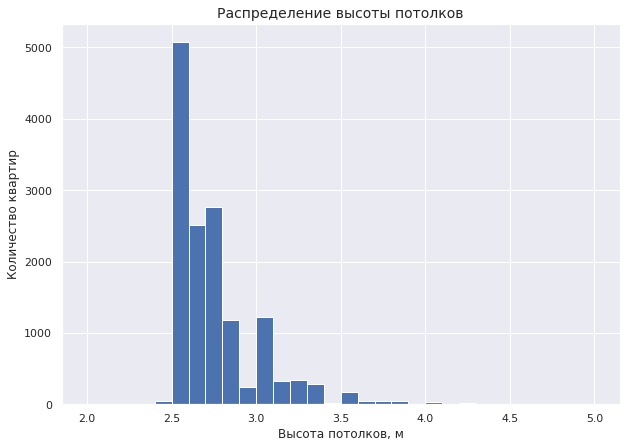

In [18]:
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.title("Распределение высоты потолков", size=14)
plt.show()

In [19]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

видим что есть необоснованно большие значения но пока оставим их как есть,
медиана от среднего отличается не сильно из-за этих выбросов во всей выборке

df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

Пропуски по удаленности от ближайшего аэропорта = airports_nearest, вероятнее всего вызваны технической ошибкой или банальным незнанием этих данных заполняющим объявление. Заполним медианными значениями в соответствии с locality_name

In [21]:
df['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
42695.0     1
53478.0     1
20335.0     1
33699.0     1
20875.0     1
Name: airports_nearest, Length: 8251, dtype: int64

In [22]:
distance_med=df.groupby('locality_name')['airports_nearest'].median()
for locality_name in distance_med.index:
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == locality_name), 'airports_nearest'] = distance_med.loc[locality_name]

Проверяем текущее состояние по пропускам:

In [23]:
miss_value=pd.DataFrame(df.isna().mean()).reset_index()
miss_value.set_axis(['column_name', 'missing_value'], axis = 'columns', inplace = True)
miss_value.sort_values(by='missing_value', ascending=False).style.format({ 'missing_value': '{:,.2%}'.format})

,column_name,missing_value
18,parks_nearest,65.92%
20,ponds_nearest,61.65%
5,ceiling_height,38.55%
16,cityCenters_nearest,23.34%
15,airports_nearest,23.05%
21,days_exposition,13.46%
12,kitchen_area,9.43%
7,living_area,7.91%
13,balcony,0.00%
22,parks_nearest_groups,0.00%


По airports_nearest сохраняется большая доля пропусков, посмотрим диапазон данных в столбце, произведем группировку и введем значение "неизвестно" там, где данные отсутствуют

In [24]:
print('минимальное значение - ', (min(df['airports_nearest'])),'\n','максимальное значение - ', (max(df['airports_nearest'])), sep='')

минимальное значение - 0.0
максимальное значение - 84869.0


In [25]:
def airports_nearest_group (dist):
    if dist <= 10000:
        return "до 10000"
    elif dist <= 50000:
        return "от 10001 до 50000"
    elif dist > 50000:
        return "свыше 51000"
    else:
        return "неизвестно"
df['airports_nearest_groups'] = df['airports_nearest'].apply(airports_nearest_group)

Пропуски по расстоянию до центра города обработаем аналогично пропускам в airports_nearest

In [26]:
distance_med=df.groupby('locality_name')['cityCenters_nearest'].median()
for locality_name in distance_med.index:
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality_name), 'cityCenters_nearest'] = distance_med.loc[locality_name]
print('минимальное значение - ', (min(df['cityCenters_nearest'])),'\n','максимальное значение - ', (max(df['cityCenters_nearest'])), sep='')

минимальное значение - 181.0
максимальное значение - 65968.0


In [27]:
def cityCenters_nearest_group (dist):
    if dist <= 3000:
        return "до 3000"
    elif dist <= 10000:
        return "от 3001 до 10000"
    elif dist > 10000:
        return "свыше 11000"
    else:
        return "неизвестно"
df['city_center_nearest_group'] = df['cityCenters_nearest'].apply(cityCenters_nearest_group)

Пропуски по количеству дней от публикации до снятия объявления вероятнее всего вызваны технической ошибкой. Значения в колонке по количеству дней от публикации до снятия объявления сгруппируем в новой колонке, пропуски заполним значением "неизвестно"

In [28]:
def days_exposition_group (days):
    if days <= 30:
        return "до 30"
    elif days <= 180:
        return "от 31 до 180"
    elif days > 180:
        return "свыше 180"
    else:
        return "неизвестно"
df['days_exposition_group'] = df['days_exposition'].apply(days_exposition_group)

In [29]:
kitchen_area_ratio_mean = (df['kitchen_area'] / df['total_area']).mean()

#Для заполнения будем использовать среднее соотношение. 
df['kitchen_area'] = df['kitchen_area'].fillna(0)

def fill_kitchen_area(row):
    if row[12] == 0 or row[12] > row[7]:
        row[12] = float(format(row[2] * kitchen_area_ratio_mean, '.2f'))
    return row

df = df.apply(fill_kitchen_area, axis=1)

df['kitchen_area'].unique()

array([25.  , 11.  ,  8.3 , ..., 21.55, 26.04, 15.04])

In [30]:
print('Медианная площадь кухни', df['kitchen_area'].median())

Медианная площадь кухни 9.0


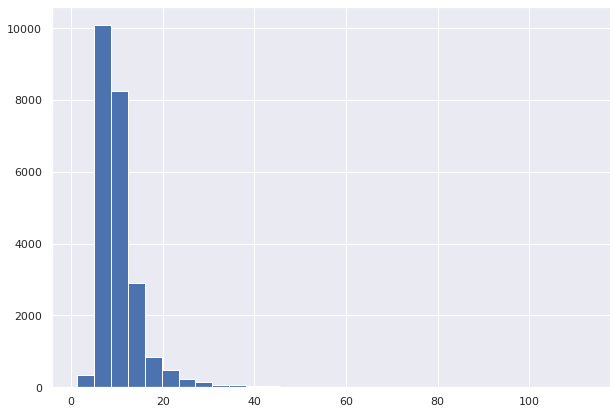

In [31]:
df['kitchen_area'].hist(bins = 30);

In [32]:
# Код итоговый
df.query('kitchen_area > living_area')[['kitchen_area', 'living_area', 'total_area']]

,kitchen_area,living_area,total_area
1326,9.74,9.0,52.0
2309,11.69,8.4,62.4
3242,7.68,3.0,41.0
6944,18.87,16.4,100.7
13915,9.74,2.0,52.0
16034,11.28,10.5,60.2
20994,9.48,8.0,50.6
21758,4.31,2.0,23.0
21943,14.54,5.4,77.6
23574,26.04,3.0,139.0


In [33]:
#заполняем пропуски в жилой площади
df['living_area'] = df['living_area'].fillna(0)
living_area_ratio_mean = (df['living_area'] / df['total_area']).mean()

def fill_living_area(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row

df = df.apply(fill_living_area, axis=1)

df['living_area'].isna().value_counts()

False    23565
Name: living_area, dtype: int64

In [34]:
print('Медианная жилая площадь', df['living_area'].median())

Медианная жилая площадь 30.0


In [35]:
print('Медианная общая площадь', df['total_area'].median())

Медианная общая площадь 52.0


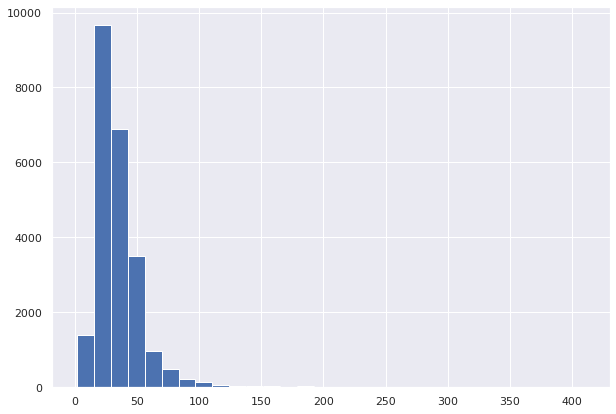

In [36]:
# Код итоговый
df['living_area'].hist(bins = 30);

Проверим результаты заполнения пропусков

In [37]:
miss_value=pd.DataFrame(df.isna().mean()).reset_index()
miss_value.set_axis(['column_name', 'missing_value'], axis = 'columns', inplace = True)
miss_value.sort_values(by='missing_value', ascending=False).style.format({ 'missing_value': '{:,.2%}'.format})

,column_name,missing_value
18,parks_nearest,65.92%
20,ponds_nearest,61.65%
5,ceiling_height,38.55%
16,cityCenters_nearest,23.05%
15,airports_nearest,23.05%
21,days_exposition,13.46%
0,total_images,0.00%
14,locality_name,0.00%
25,city_center_nearest_group,0.00%
24,airports_nearest_groups,0.00%


Итоговый размер датасета после обработки пропусков

In [38]:
df.shape

(23565, 27)

**Приведение данных к нужным типам:**

Выведем текущие столбы по датасету и ознакомимся с их типом данных

In [39]:
df.dtypes

total_images                   int64
last_price                   float64
total_area                   float64
first_day_exposition          object
rooms                          int64
ceiling_height               float64
floors_total                 float64
living_area                  float64
floor                          int64
is_apartment                    bool
studio                          bool
open_plan                       bool
kitchen_area                 float64
balcony                      float64
locality_name                 object
airports_nearest             float64
cityCenters_nearest          float64
parks_around3000             float64
parks_nearest                float64
ponds_around3000             float64
ponds_nearest                float64
days_exposition              float64
parks_nearest_groups          object
ponds_nearest_groups          object
airports_nearest_groups       object
city_center_nearest_group     object
days_exposition_group         object
d

Преобразуем тип данных в колонке first_day_exposition - дата первого размещения в формат даты без времени, т.к. время не указано

In [40]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [41]:
df['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Проверим что получилось:

In [42]:
print(df.dtypes)

total_images                          int64
last_price                          float64
total_area                          float64
first_day_exposition         datetime64[ns]
rooms                                 int64
ceiling_height                      float64
floors_total                        float64
living_area                         float64
floor                                 int64
is_apartment                           bool
studio                                 bool
open_plan                              bool
kitchen_area                        float64
balcony                             float64
locality_name                        object
airports_nearest                    float64
cityCenters_nearest                 float64
parks_around3000                    float64
parks_nearest                       float64
ponds_around3000                    float64
ponds_nearest                       float64
days_exposition                     float64
parks_nearest_groups            

**Удалим дубликаты:**

In [43]:
print(df.shape)
key = ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'first_day_exposition']
df = df.drop_duplicates(subset=key)
print(df.shape)

(23565, 27)
(23562, 27)


дубликатов было совсем мало

**last_price - переведём в миллионы рублей**

In [44]:
df['last_price'] = df['last_price']/1000000

In [45]:
print(df['last_price'].head(5))

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
Name: last_price, dtype: float64


Очистим данные столбца "ceiling_height" от неправдоподобных значений, т.е. от данных, где потолок выше 15 метров.

In [46]:
print("Количество квартир с потолками выше 4 метров:", df[df['ceiling_height'] >= 4].count()[0])

Количество квартир с потолками выше 4 метров: 113


Будем считать что все, что выше 4 метров - это пентхаусы. 77 пентхаусов от общего числа выглядит правдоподобно, оставляем.

In [47]:
print("Количество квартир с потолками выше 15 метров:", df[df['ceiling_height'] > 15].count()[0])

Количество квартир с потолками выше 15 метров: 23


In [48]:
df['ceiling_height'].isnull().sum()

9084

In [49]:
df['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1107
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [50]:
df['ceiling_height'].median()

2.65

In [51]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

In [52]:
#Проверим, не осталось ли незаполненных пропусков:
df['ceiling_height'].isna().sum()

0

In [53]:
df['ceiling_height'].value_counts()

2.65     9758
2.50     3515
2.60     1645
2.70     1571
3.00     1107
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [54]:
df['ceiling_height'].max()

100.0

In [55]:
#Устраним неявные дубликаты в названиях населенных пунктов в столбце ['locality_name']. Для начала выведем все уникальные значения этого столбца
df.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что у нас много названий мест, которые начинаются с "посёлок городского типа", "поселок городского типа", "городской поселок" и "поселок". За такими названиями могут скрываться дубликаты.

In [56]:
replace_list = ['поселок городского типа ', 'посёлок городского типа ', 'городской поселок ', \
                'городской посёлок ', 'посёлок ', 'поселок ', 'деревня ', 'село ']
df['locality_unduplicated'] = df['locality_name']
for replace in replace_list:
    df['locality_unduplicated'] = df['locality_unduplicated'].str.replace(replace, '')
df.locality_unduplicated.sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёв

Количество уникальных значений локаций до и после обработки неявных дубликатов:


In [57]:
print('до обработки дубликатов:', len(df.locality_name.unique()))

до обработки дубликатов: 364


In [58]:
print('после обработки дубликатов:', len(df.locality_unduplicated.unique()))

после обработки дубликатов: 311


In [59]:
df[['locality_name', 'locality_unduplicated']]

,locality_name,locality_unduplicated
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23694,Санкт-Петербург,Санкт-Петербург
23695,Тосно,Тосно
23696,село Рождествено,Рождествено
23697,Санкт-Петербург,Санкт-Петербург


**Теперь в датасете отсутствуют дубликаты, пропущенные значения, также они приведены к корректному типу данных. Столбцы с расстояниями сгруппированы в отдельные колонки. На этом этап предобработки данных завершен.**

### Посчитайте и добавьте в таблицу новые столбцы

**Цена квадратного метра:**

In [61]:
df.reset_index(inplace=True)

In [62]:
df['price_per_meter']=((df['last_price'])/df['total_area'])*1000000
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,parks_nearest_groups,ponds_nearest_groups,airports_nearest_groups,city_center_nearest_group,days_exposition_group,locality_unduplicated,price_per_meter
0,0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.00,8,...,2.0,755.0,NaN,до 500,от 501 до 1500,от 10001 до 50000,свыше 11000,неизвестно,Санкт-Петербург,120370.370370
1,1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.60,1,...,0.0,NaN,81.0,свыше 3001,свыше 3001,от 10001 до 50000,свыше 11000,от 31 до 180,Шушары,82920.792079
2,2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.30,4,...,2.0,574.0,558.0,до 500,от 501 до 1500,от 10001 до 50000,свыше 11000,свыше 180,Санкт-Петербург,92785.714286
3,3,0,64.900,159.0,2015-07-24,3,2.65,14.0,82.72,9,...,3.0,234.0,424.0,до 500,до 500,от 10001 до 50000,от 3001 до 10000,свыше 180,Санкт-Петербург,408176.100629
4,4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.00,13,...,1.0,48.0,121.0,до 500,до 500,от 10001 до 50000,от 3001 до 10000,от 31 до 180,Санкт-Петербург,100000.000000


для удобства просмотра приведем к типу int

In [63]:
df['price_per_meter'] = df['price_per_meter'].astype('int')

**День недели, месяц и год публикации объявления:**

In [64]:
df['exp_weekday']=df['first_day_exposition'].dt.weekday.astype('str').map({'0': 'Пн', '1': 'Вт', '2': 'Ср', '3': 'Чт', '4': 'Пт', '5': 'Сб', '6': 'Вс'})
df['exp_month']=df['first_day_exposition'].dt.month.astype('str').map({'1': 'ЯНВ', '2': 'ФЕВ', '3': 'МАР', '4': 'АПР', '5': 'МАЙ', '6': 'ИЮН', '7': 'ИЮЛ', '8': 'АВГ', '9': 'СЕНТ', '10': 'ОКТ', '11': 'НОЯ', '12': 'ДЕК'})
df['exp_year']=df['first_day_exposition'].dt.year

**Этаж квартиры:**

Перед группировкой проверим есть ли квартиры в одноэтажных домах

In [65]:
len(df.loc[df['floors_total']==1])

25

При группировке отнесем их к квартирам на первом этаже

In [66]:
def floor_groups(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    return 'другой этаж'
df['floor_groups'] = df.apply(floor_groups, axis=1)
df['floor_groups'].head(10)

0    другой этаж
1    первый этаж
2    другой этаж
3    другой этаж
4    другой этаж
5    другой этаж
6    другой этаж
7    другой этаж
8    другой этаж
9    другой этаж
Name: floor_groups, dtype: object

In [67]:
# Код проверки
df[['floor', 'floors_total', 'floor_groups']].sample(10)

,floor,floors_total,floor_groups
14295,5,5.0,последний этаж
8826,3,6.0,другой этаж
5262,2,4.0,другой этаж
3594,7,10.0,другой этаж
578,7,7.0,последний этаж
9840,5,6.0,другой этаж
19271,1,3.0,первый этаж
23370,21,26.0,другой этаж
23256,3,12.0,другой этаж
19094,2,4.0,другой этаж


**Добавим столбец -  расстояние от центра в км и округлим до целых значений**

In [68]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000, 0)

In [69]:
print(df['cityCenters_nearest_km'].head(5))

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest_km, dtype: float64


In [70]:
print(df['cityCenters_nearest'].head(5))

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      23562 non-null  int64         
 1   total_images               23562 non-null  int64         
 2   last_price                 23562 non-null  float64       
 3   total_area                 23562 non-null  float64       
 4   first_day_exposition       23562 non-null  datetime64[ns]
 5   rooms                      23562 non-null  int64         
 6   ceiling_height             23562 non-null  float64       
 7   floors_total               23562 non-null  float64       
 8   living_area                23562 non-null  float64       
 9   floor                      23562 non-null  int64         
 10  is_apartment               23562 non-null  bool          
 11  studio                     23562 non-null  bool          
 12  open

In [72]:
df.sample(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest_groups,city_center_nearest_group,days_exposition_group,locality_unduplicated,price_per_meter,exp_weekday,exp_month,exp_year,floor_groups,cityCenters_nearest_km
1533,1538,10,17.50,128.0,2017-04-01,3,3.00,6.0,75.0,5,...,свыше 51000,свыше 11000,свыше 180,Санкт-Петербург,136718,Сб,АПР,2017,другой этаж,15.0
20705,20823,14,2.70,45.2,2017-01-25,2,2.65,5.0,28.8,3,...,неизвестно,неизвестно,свыше 180,Сертолово,59734,Ср,ЯНВ,2017,другой этаж,NaN
15897,15985,13,15.30,136.0,2018-03-20,4,2.65,16.0,86.0,7,...,от 10001 до 50000,свыше 11000,от 31 до 180,Санкт-Петербург,112500,Вт,МАР,2018,другой этаж,22.0
5717,5746,4,4.85,50.0,2016-06-15,2,2.55,14.0,30.0,12,...,от 10001 до 50000,свыше 11000,от 31 до 180,Санкт-Петербург,96999,Ср,ИЮН,2016,другой этаж,11.0
9871,9918,8,5.45,55.0,2016-06-25,2,2.65,12.0,32.0,5,...,от 10001 до 50000,свыше 11000,до 30,Санкт-Петербург,99090,Сб,ИЮН,2016,другой этаж,11.0
17467,17566,9,5.15,43.8,2018-02-01,2,3.05,5.0,27.9,5,...,от 10001 до 50000,от 3001 до 10000,свыше 180,Санкт-Петербург,117579,Чт,ФЕВ,2018,последний этаж,7.0
12592,12663,18,2.00,63.0,2018-04-19,3,2.65,5.0,46.0,4,...,неизвестно,неизвестно,неизвестно,Каменногорск,31746,Чт,АПР,2018,другой этаж,NaN
21702,21827,11,4.39,46.0,2015-03-16,2,2.50,10.0,26.0,6,...,от 10001 до 50000,от 3001 до 10000,свыше 180,Санкт-Петербург,95434,Пн,МАР,2015,другой этаж,6.0
19423,19533,15,10.30,87.4,2018-04-19,5,2.65,6.0,62.0,5,...,от 10001 до 50000,от 3001 до 10000,неизвестно,Санкт-Петербург,117848,Чт,АПР,2018,другой этаж,4.0
6030,6062,1,4.90,55.0,2017-08-30,1,3.00,20.0,25.0,2,...,от 10001 до 50000,свыше 11000,от 31 до 180,Санкт-Петербург,89090,Ср,АВГ,2017,другой этаж,15.0


In [73]:
miss_value=pd.DataFrame(df.isna().mean()).reset_index()
miss_value.set_axis(['column_name', 'missing_value'], axis = 'columns', inplace = True)
miss_value.sort_values(by='missing_value', ascending=False).style.format({ 'missing_value': '{:,.2%}'.format})

,column_name,missing_value
19,parks_nearest,65.92%
21,ponds_nearest,61.65%
17,cityCenters_nearest,23.05%
16,airports_nearest,23.05%
34,cityCenters_nearest_km,23.05%
22,days_exposition,13.45%
5,rooms,0.00%
6,ceiling_height,0.00%
33,floor_groups,0.00%
32,exp_year,0.00%


**Теперь 23562 строки (было 23699). По колонкам nearest сгруппировали категориально, касаемо пропусков.**

### Проведите исследовательский анализ данных

**Изучите следующие параметры:**

  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

**Постройте гистограммы для каждого параметра.**

Так как гистограммы применимы к данным с числовыми и datetime, то в группировочных столбцах с параметрами («первый», «последний», «другой») и т.п. визцализацию сделаем в виде круговой диаграммы (pie)

**Изучаем площади**

In [74]:
df[['total_area']].describe()

,total_area
count,23562.000000
mean,60.314653
std,35.649008
min,12.000000
25%,40.000000
50%,52.000000
75%,69.700000
max,900.000000


есть заметная разница между  показателями в столбце с площадью, предполагаем имеются выбросы

построим диаграмму размаха и гистограмму:

Text(0.5, 1.0, 'Диаграмма размаха значений общей площади')

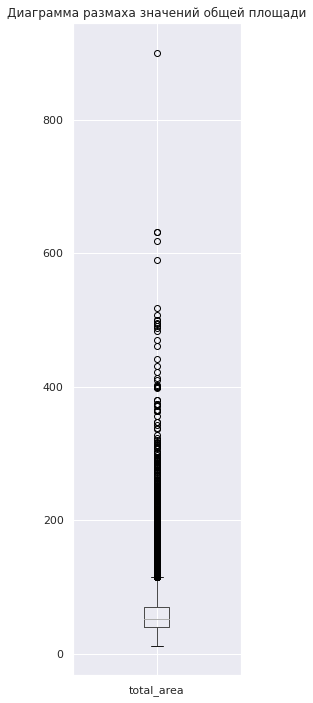

In [75]:
boxplot = df.boxplot('total_area', figsize = (3, 12))
boxplot.set_title('Диаграмма размаха значений общей площади')

Text(0.5, 1.0, 'Распределение значений площади')

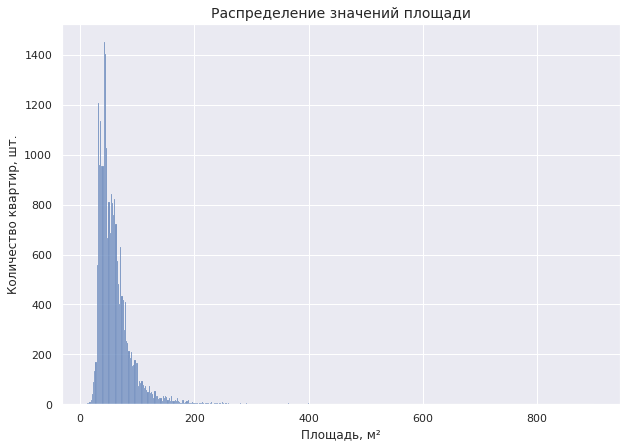

In [76]:
sns.histplot(df['total_area'])
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений площади", size=14)

далее построим гистограмму, но без учёта выбросов (метод get_ydata позволяет взять точные значения границ "усов"):

In [77]:
boxplot_data = plt.boxplot(df['total_area'], autorange=True)
plt.close()
whiskers_area = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_area

[array([40., 12.]), array([ 69.7, 114.2])]

In [78]:
total_area_good = df.query('total_area < @whiskers_area[1][1] and total_area > @whiskers_area[0][1]')[['total_area']]

Text(0.5, 1.0, 'Распределение значений площади после корректировки')

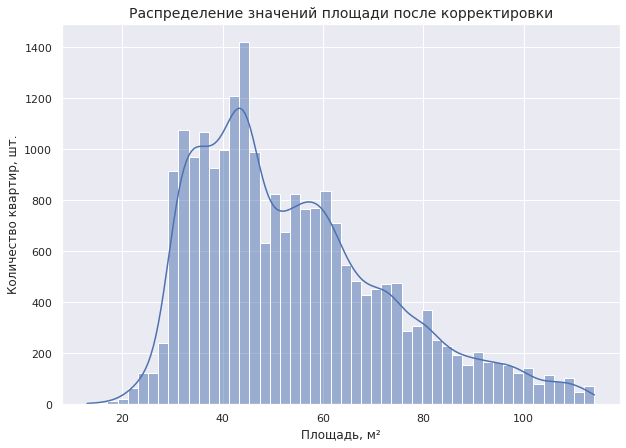

In [79]:
sns.histplot(total_area_good['total_area'], bins = 50, kde=True)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений площади после корректировки", size=14)

**Вывод:** Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.
Пик приходится ~ 45 кв.м.


Далее повторим те же шаги где это возможно

**Изучаем цену:**

In [80]:
df[['last_price']].describe()

,last_price
count,23562.000000
mean,6.538716
std,10.910582
min,0.012190
25%,3.400000
50%,4.645000
75%,6.790000
max,763.000000


есть заметная разница между показателями в столбце с площадью, предполагаем имеются выбросы

Text(0.5, 1.0, 'Диаграмма размаха значений цены')

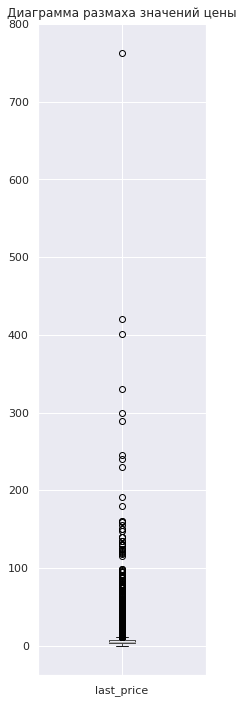

In [81]:
boxplot = df.boxplot('last_price', figsize = (3, 12))
boxplot.set_title('Диаграмма размаха значений цены')

Text(0.5, 1.0, 'Распределение значений цен на квартиры')

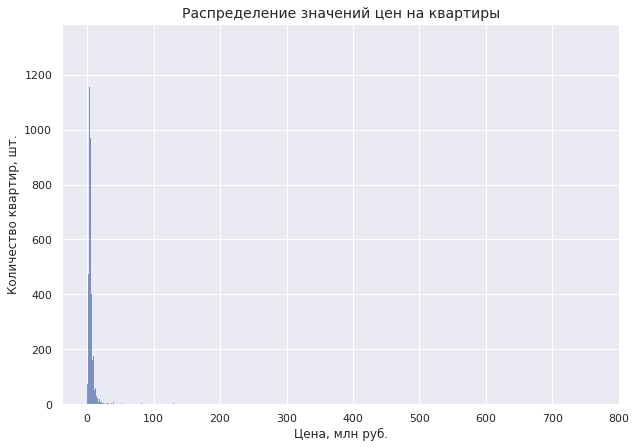

In [82]:
sns.histplot(df['last_price'])
plt.xlabel('Цена, млн руб.')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений цен на квартиры", size=14)

Довольно много выбросов с повышенной ценой квартиры, которые искажают гистограмму и при этом их не видно

In [83]:
boxplot_data = plt.boxplot(df['last_price'])
plt.close()
whiskers_price = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_price

[array([3.4    , 0.01219]), array([ 6.79   , 11.86686])]

In [84]:
last_price_good = df.query('last_price < @whiskers_price[1][1] and last_price > @whiskers_price[0][1]')[['last_price']]

Text(0.5, 1.0, 'Распределение значений цен после корректировки')

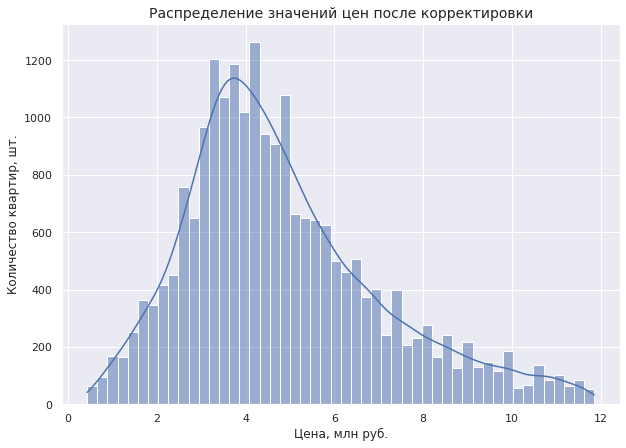

In [85]:
sns.histplot(last_price_good['last_price'], bins = 50, kde=True)
plt.xlabel('Цена, млн руб.')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений цен после корректировки", size=14)

**Вывод:** Распределение цен близко к нормальному и имеет вид перевернутого колокола с наибольшей концентрацией в районе около 4 млн. руб. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

**Изучаем число комнат:**

In [86]:
df[['rooms']].describe()

,rooms
count,23562.000000
mean,2.070537
std,1.078569
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


Text(0.5, 1.0, 'Диаграмма размаха числа комнат')

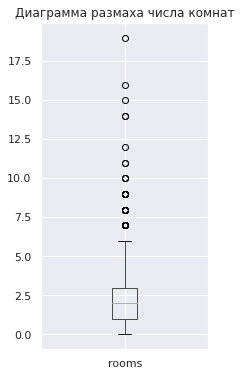

In [87]:
boxplot = df.boxplot('rooms', figsize=(3,6))
boxplot.set_title('Диаграмма размаха числа комнат')

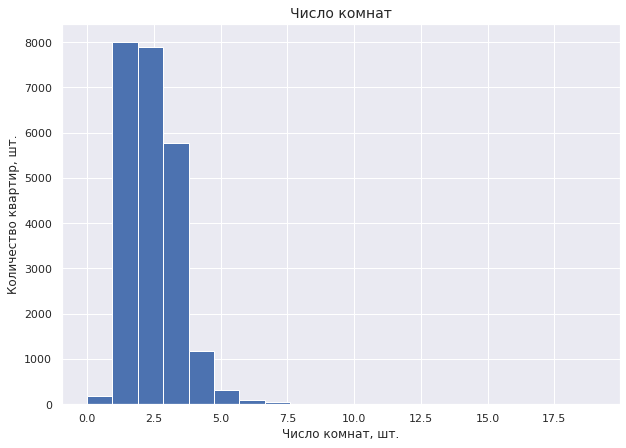

In [88]:
df.hist('rooms', bins=20)
plt.title('Число комнат', size=14)
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство в продаже 1-2 комнатных квартир. Пик наблюдений на отметке в 1 комнату, почти нулевые значения по 6 и более комнатам. Странно выглядят данные по квартирам с 0 комнатами, удалим их.

In [89]:
df.drop(df[df['rooms'] < 1 ].index, inplace=True)

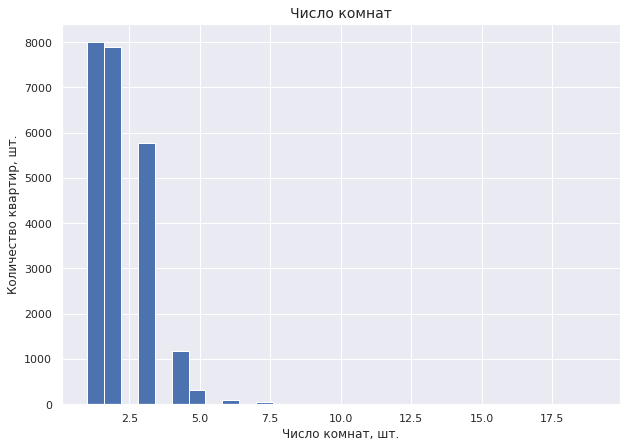

In [90]:
df.hist('rooms', bins=30)
plt.title('Число комнат', size=14)
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()

**Вывод:** Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

**Изучаем высоту потолков:**

In [91]:
df[['ceiling_height']].describe()

,ceiling_height
count,23368.000000
mean,2.723517
std,0.982146
min,1.000000
25%,2.600000
50%,2.650000
75%,2.700000
max,100.000000


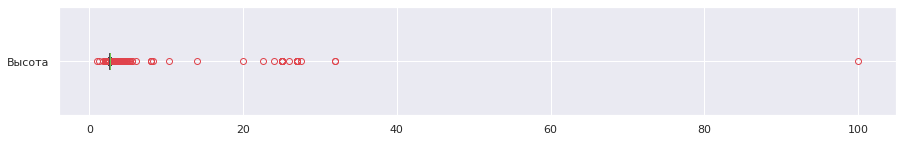

In [92]:
ax=df.boxplot('ceiling_height', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
ax.set_yticklabels(['Высота'])
plt.show()

Пик наблюдений на отметке в 2-3 метра, есть выбросы в обе стороны от нормального распределения, удалим явные выбросы

In [93]:
df.drop(df[df['ceiling_height'] > 5].index, inplace=True)
df.drop(df[df['ceiling_height'] < 2].index, inplace=True)

Text(0.5, 1.0, 'Диаграмма размаха значений высоты потолков')

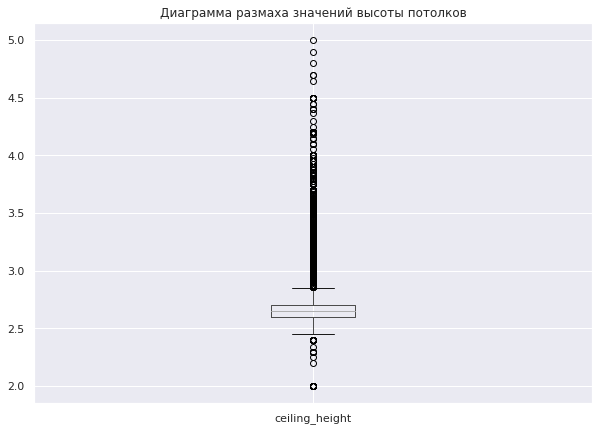

In [94]:
boxplot = df.boxplot('ceiling_height')
boxplot.set_title('Диаграмма размаха значений высоты потолков')

Text(0.5, 1.0, 'Распределение значений высоты потолка')

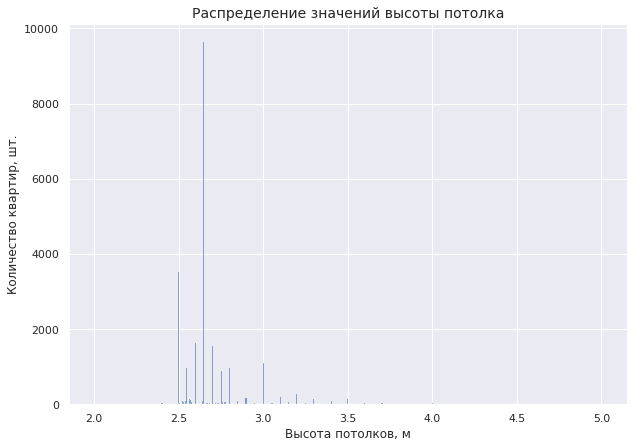

In [95]:
sns.histplot(df['ceiling_height'])
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений высоты потолка", size=14)

In [96]:
df[['ceiling_height']].describe()

,ceiling_height
count,23331.000000
mean,2.696052
std,0.216442
min,2.000000
25%,2.600000
50%,2.650000
75%,2.700000
max,5.000000


**Вывод:** Высота потолков в среднем составляет 2,7 м, медиана 2,65 м.

**Изучаем этаж квартиры:**

In [97]:
df[['floor']].describe()

,floor
count,23331.000000
mean,5.855900
std,4.851447
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


Text(0.5, 1.0, 'Диаграмма размаха значений этажей квартир в продаже')

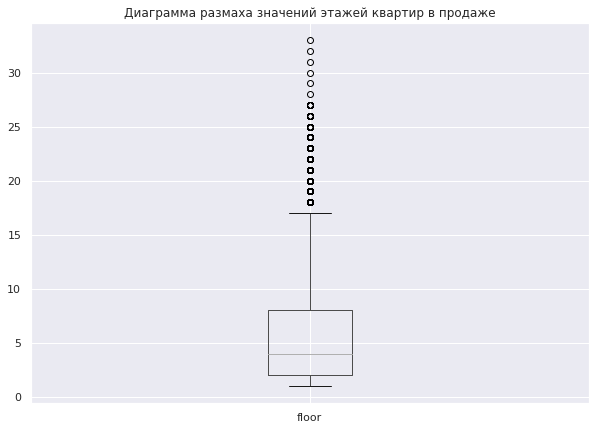

In [98]:
boxplot = df.boxplot('floor')
boxplot.set_title('Диаграмма размаха значений этажей квартир в продаже')

In [99]:
boxplot_data = plt.boxplot(df['floor'])
plt.close()
whiskers_floor = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_floor

[array([2., 1.]), array([ 8., 17.])]

In [100]:
floor_good = df.query('floor < @whiskers_floor[1][1] and floor > @whiskers_floor[0][1]')[['floor']]

Text(0.5, 1.0, 'Распределение значений этажей после корректировки')

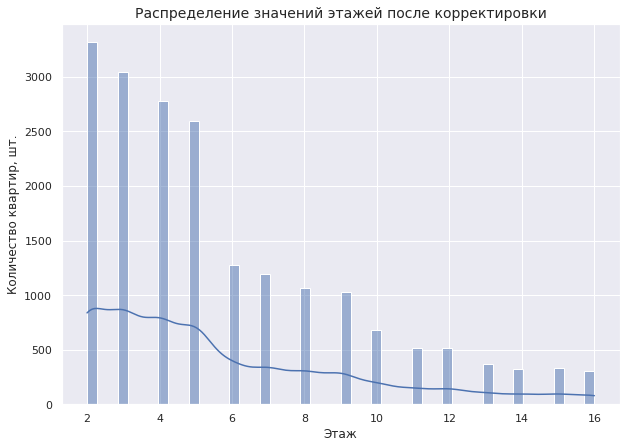

In [101]:
sns.histplot(floor_good['floor'], bins = 50, kde=True)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение значений этажей после корректировки", size=14)

**Вывод:** Больше всего в продаже квартир на 2 этаже, медиана 4, среднее 5-6 этаж. 

**Изучаем тип этажа квартиры:**

<AxesSubplot:ylabel='floor_groups'>

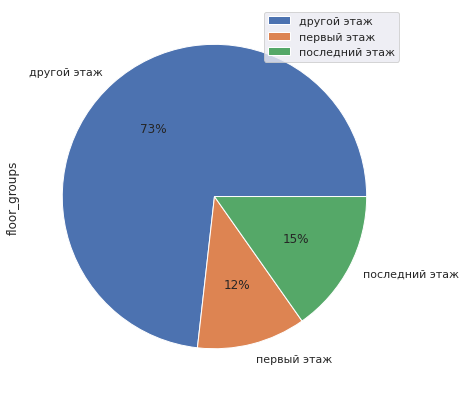

In [102]:
df.groupby(['floor_groups']).sum().plot(kind='pie', y=df['floor_groups'].nunique(), autopct='%1.0f%%', ylabel='floor_groups')

**Вывод:** Основная масса квартир ни первый не последний этаж, первый и последний этажи примерно одинаковую долю составляют.

**Изучаем общее количество этажей в доме:**

Text(0.5, 1.0, 'Диаграмма размаха общего количество этажей в доме')

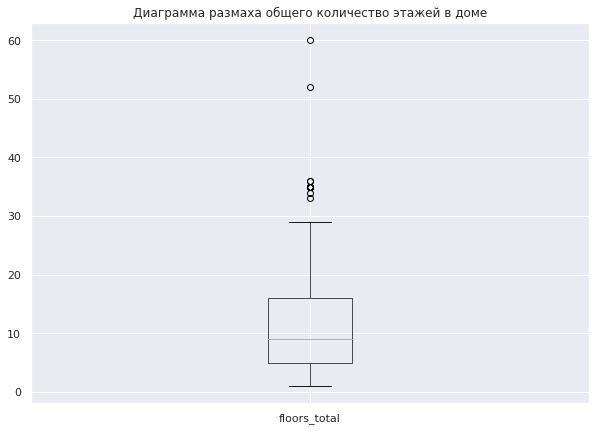

In [103]:
boxplot = df.boxplot('floors_total')
boxplot.set_title('Диаграмма размаха общего количество этажей в доме')

In [104]:
boxplot_data = plt.boxplot(df['floors_total'])
plt.close()
whiskers_floors_total = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_floors_total

[array([5., 1.]), array([16., 29.])]

In [105]:
floors_total_good = df.query('floors_total < @whiskers_floor[1][1] and floors_total > @whiskers_floor[0][1]')[['floors_total']]

Text(0.5, 1.0, 'Распределение после корректировки')

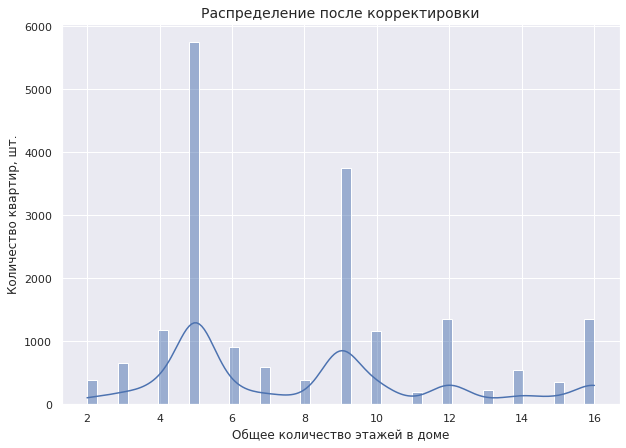

In [106]:
sns.histplot(floors_total_good['floors_total'], bins = 50, kde=True)
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество квартир, шт.')
plt.title("Распределение после корректировки", size=14)

**Вывод:** в основном продаются квартиры на 5 и 9 этажах.

**Изучаем расстояние до центра города в метрах:**

Text(0.5, 1.0, 'Диаграмма размаха расстояния до центра города в метрах')

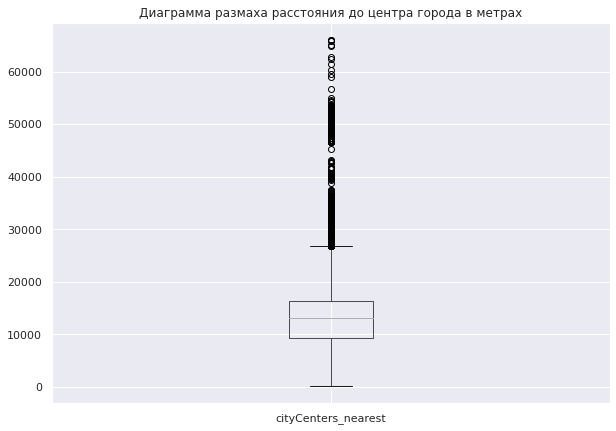

In [107]:
boxplot = df.boxplot('cityCenters_nearest')
boxplot.set_title('Диаграмма размаха расстояния до центра города в метрах')

<AxesSubplot:ylabel='city_center_nearest_group'>

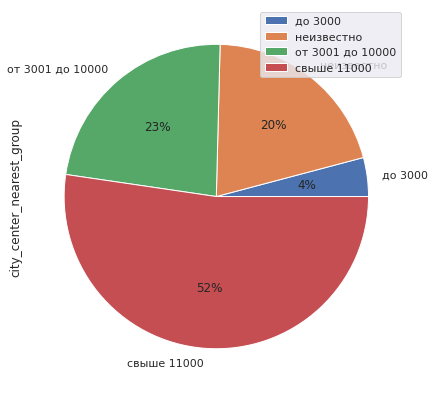

In [108]:
df.groupby(['city_center_nearest_group']).sum().plot(kind='pie', y=df['city_center_nearest_group'].nunique(), autopct='%1.0f%%', ylabel='city_center_nearest_group')

**Вывод:** более половины квартир более 11 км от центра, далее идут от 3 до 10 км, также существенную долю составляют объявления где расстояние не указано или нет данных

**Изучаем расстояние до aэропорта в метрах:**

Text(0.5, 1.0, 'Диаграмма размаха расстояния до аэропорта в метрах')

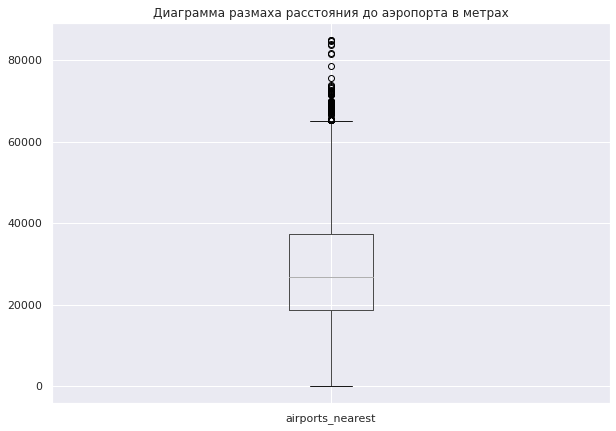

In [109]:
boxplot = df.boxplot('airports_nearest')
boxplot.set_title('Диаграмма размаха расстояния до аэропорта в метрах')

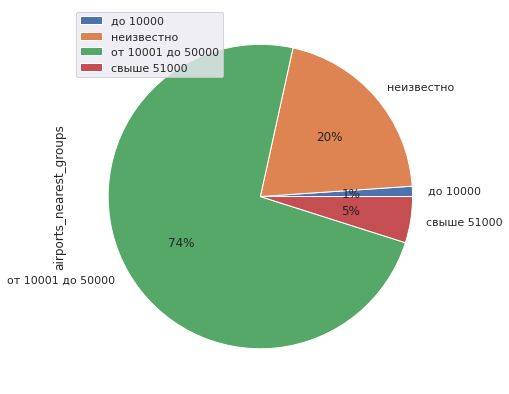

In [110]:
df.groupby(['airports_nearest_groups']).sum().plot(kind='pie', y=df['airports_nearest_groups'].nunique(), autopct='%1.0f%%', ylabel='airports_nearest_groups' )
plt.show()

**Вывод:** основная масса квартир от 10 до 50 км до аэропорта, у пятой части не указано расстояние

**Изучаем расстояние до парка в метрах:**

Text(0.5, 1.0, 'Диаграмма размаха расстояния до аэропорта в метрах')

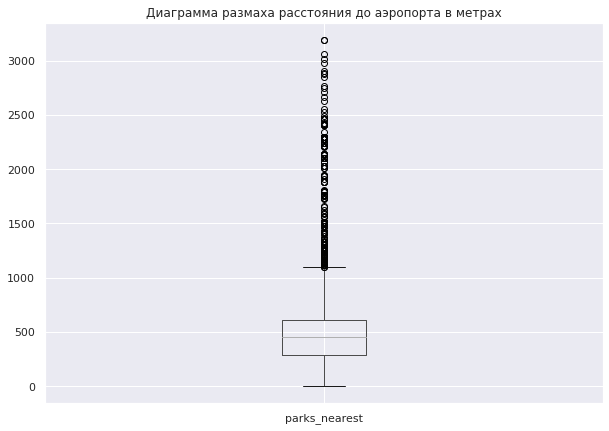

In [111]:
boxplot = df.boxplot('parks_nearest')
boxplot.set_title('Диаграмма размаха расстояния до аэропорта в метрах')

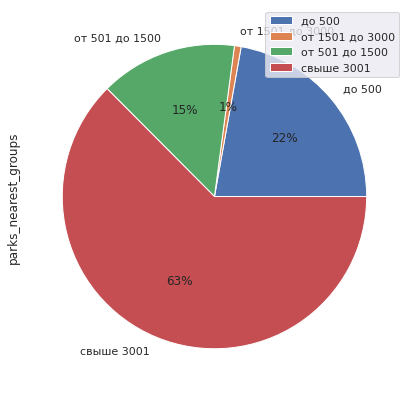

In [112]:
df.groupby(['parks_nearest_groups']).sum().plot(kind='pie', y=df['parks_nearest_groups'].nunique(), autopct='%1.0f%%', ylabel='parks_nearest_groups')
plt.show()

**Вывод:** основная масса квартир в более чем 3 км от парка, 22% совсем рядом в 500 метрах

**Изучаем день публикации объявления:**

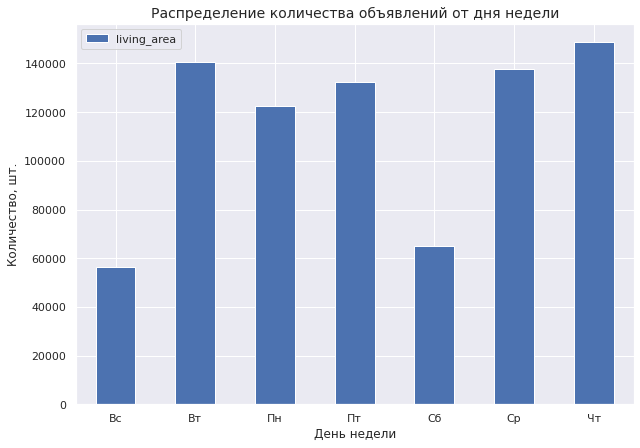

In [113]:
df.groupby(['exp_weekday']).sum().plot(kind='bar', y=df['exp_weekday'].nunique(), ylabel='exp_weekday', rot = 0)
plt.xlabel('День недели')
plt.ylabel('Количество, шт.')
plt.title("Распределение количества объявлений от дня недели", size=14)
plt.show()

**Вывод:** особой зависимости нет, в четверг, вторник, среду, пятницу и понедельник основные размещения, на выходных меньше видимо отдыхают, и деловые вопроы переносят на будние

**Изучаем месяц публикации объявления:**

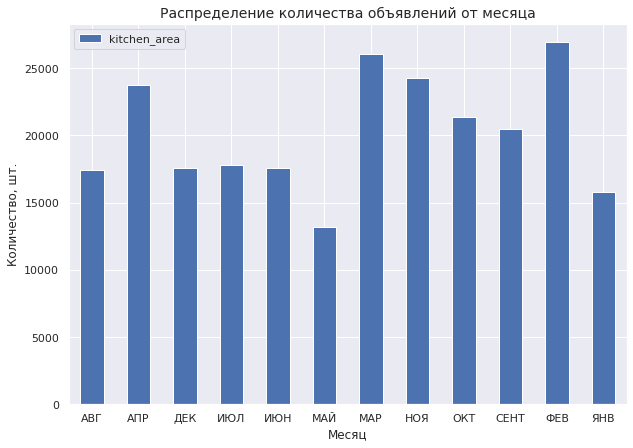

In [114]:
df.groupby(['exp_month']).sum().plot(kind='bar', y=df['exp_month'].nunique(), ylabel='exp_month', rot = 0)
plt.xlabel('Месяц')
plt.ylabel('Количество, шт.')
plt.title("Распределение количества объявлений от месяца", size=14)
plt.show()

**Вывод:** особой зависимости нет, февраль, март, апрель и ноябрь в небольшом отрыве

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.**
* Постройте гистограмму.
* Посчитайте среднее и медиану.
* В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

Text(0.5, 1.0, 'Диаграмма размаха времени продажи квартир')

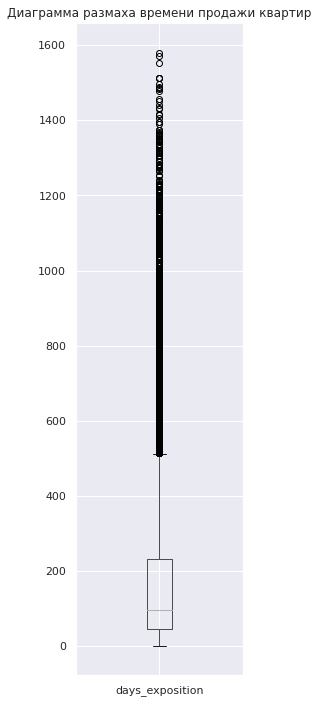

In [115]:
#диаграмма размаха
boxplot = df.boxplot('days_exposition', figsize = (3, 12))
boxplot.set_title('Диаграмма размаха времени продажи квартир')

<AxesSubplot:ylabel='Frequency'>

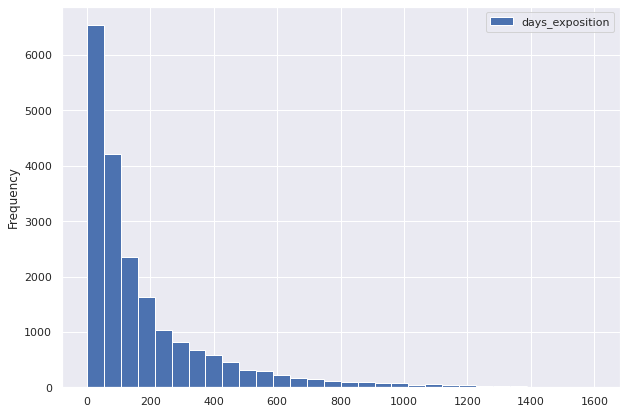

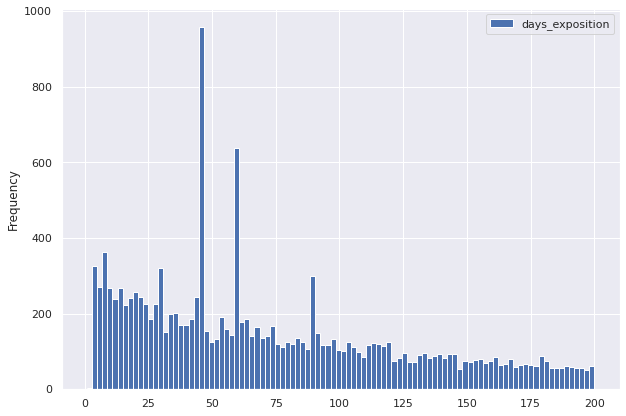

In [116]:
#гистограммы
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [117]:
#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

count    20183.000000
mean       181.351583
std        220.128446
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [118]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45.0      868
60.0      534
7.0       227
30.0      202
90.0      199
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

**Промежуточный вывод:** судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 181 день, а медиана - 96 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 7,30,45, 60, 90 днях - это наиболее популярное количество дней до снятия объявления.

Основная проблема - можно ли считать снятие объявления - продажей т.к. у размещения есть сроки публикации:
* до 4,5 млн — 45 дней
* от 4,5 до 10 млн — 60 дней
* от 10 млн — 90 дней

В эти сроки объявлени могли простоя сняться автоматом и по факту продажи не было. Но информации по этому поводу нет, поэтому нужно запросить доп.инфо у авторов датасета. Но мы этого сделать не можем поэтому оставляем это на заметку и далее избавимся от выбросов ограничив их "усы" методом get_ydata.

In [119]:
# есть ли пропуски проверим (напомню ранее мы вынесли в отд группу сроки экспозици с пропусками со значением "неизвестно", 
# сейчас очистим от них базовый столбец)
df['days_exposition'].isna().sum()

3148

In [120]:
# на всякий случай посмотрим нет ли 0 дней
df[df['days_exposition']==0]['days_exposition'].value_counts()

Series([], Name: days_exposition, dtype: int64)

In [121]:
# удалим пропуски
good_expo = df.dropna(subset = ['days_exposition'])[['days_exposition']]
good_expo

,days_exposition
1,81.0
2,558.0
3,424.0
4,121.0
5,55.0
...,...
23554,519.0
23555,413.0
23556,239.0
23558,45.0


In [122]:
boxplot_data = plt.boxplot(good_expo)
plt.close()
whiskers_expo = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_expo

[array([45.,  1.]), array([232., 512.])]

Text(0.5, 1.0, 'Распределение значений времени продажи квартир без учёта выбросов')

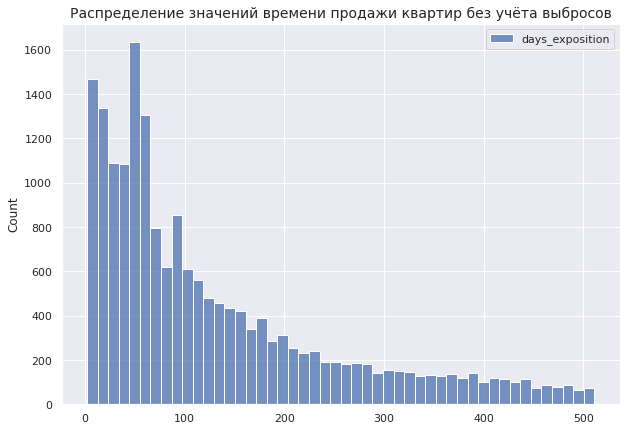

In [123]:
sns.histplot(good_expo.query('days_exposition > @whiskers_expo[0][1] and days_exposition <@whiskers_expo[1][1]'))
plt.title("Распределение значений времени продажи квартир без учёта выбросов", size=14)

In [124]:
df['days_exposition'].describe()

count    20183.000000
mean       181.351583
std        220.128446
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:** 
* Нормальные сроки продажи = На среднее время значительно повлияли выбросы, поэтому обычным временем продажи можно считать медианное значение, либо диапазон от 25% до 75% - 45-231 день.
* Верхний "ус" - 512 дней, всё что больше - можно считать аномально большим сроком продажи.
* Сверхмалые сроки = в данном случае учитывается время, которое объявление провисело на сайте, и факт продажи не подтверждается. Тогда вполне вероятно, что покупатель может найтись за 1-3 дня. Но скорее всего, человек, разместивший объявление, по каким-то причинам передумал либо снял объявление для последующей доработки.
* Полноценная же продажа кваритры с оформлением всех необходимых документов за один день невозможна. Но в задаче не требуется избавится от подобных объявлений, сделаем выводы и пойдем дальше.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров.**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

0.6513586234866346

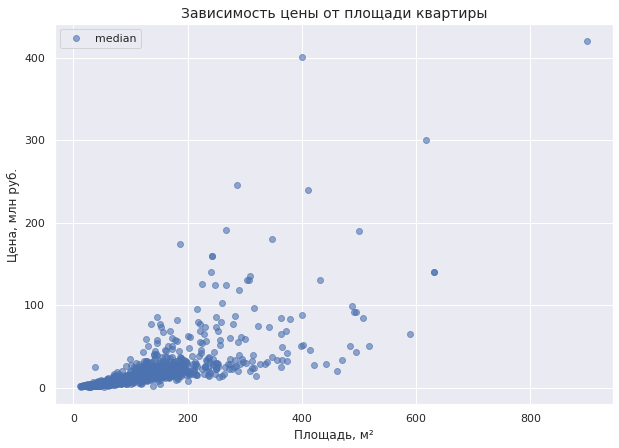

In [125]:
#зависимость цены  от общей площади квартиры.
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']

pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.6)
plt.title('Зависимость цены от площади квартиры', size=14)
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, млн руб.')

pivot_table_total_area.sort_values('median', ascending = False)
df['total_area'].corr(df['last_price'])


**Вывод:**  Имеется средне-положительная линейная зависимость - Коэффициенту корреляции Пирсона - 0.65 = То есть, чем больше площадь, тем выше стоимость.

0.3637159335430375

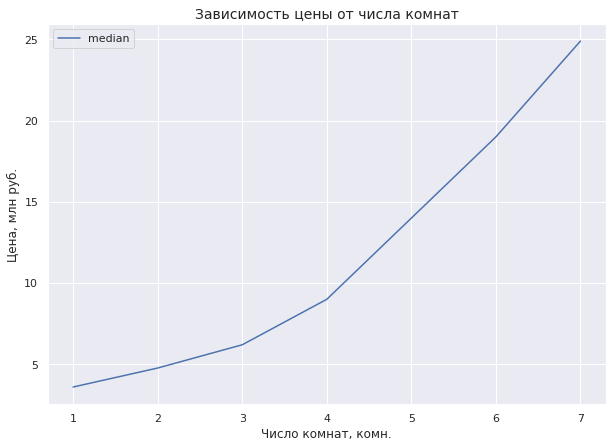

In [126]:
#зависимость цены от числа комнат.
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
plt.title('Зависимость цены от числа комнат', size=14)
plt.xlabel('Число комнат, комн.')
plt.ylabel('Цена, млн руб.')
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)
df['rooms'].corr(df['last_price'])

**Вывод:**  чем больше комнат, тем дороже, но Коэффициент корреляции Пирсона = 0,36 зависимость не очень сильная, хотя на графике существенная, видимо существенно влияют иные факторы (элитность, клубный дом, место, центр и т.п.)

,mean,count,median
floor_groups,,,
другой этаж,6.703873,17134,4.86
первый этаж,4.817794,2888,3.90
последний этаж,7.267036,3309,4.30


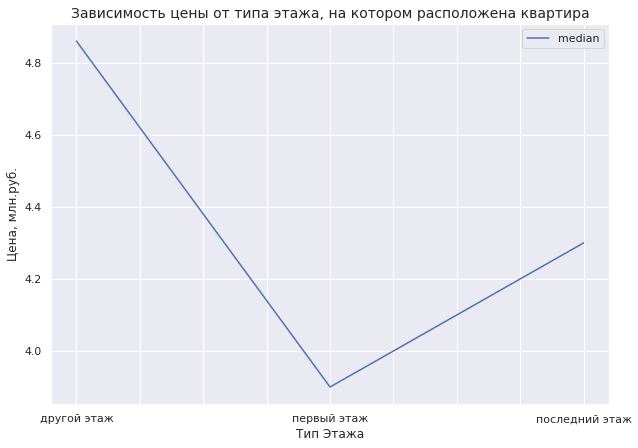

In [127]:
#зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)
pivot_table_floor_category = df.pivot_table(index = 'floor_groups', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
plt.title('Зависимость цены от типа этажа, на котором расположена квартира', size=14)
plt.xlabel('Тип Этажа')
plt.ylabel('Цена, млн.руб.')
pivot_table_floor_category

**Вывод:** на первом этаже самые дешевые квартиры, на первом дешевле чем на последнем если сравнить только с ним/ большинство квартир в выборке не на 1 и не на последнем с самой высокой медианной ценой, средняя самая высокая цена на квартиры на последнем этаже (пентхаусы предполагаю)

0.5799055037979235

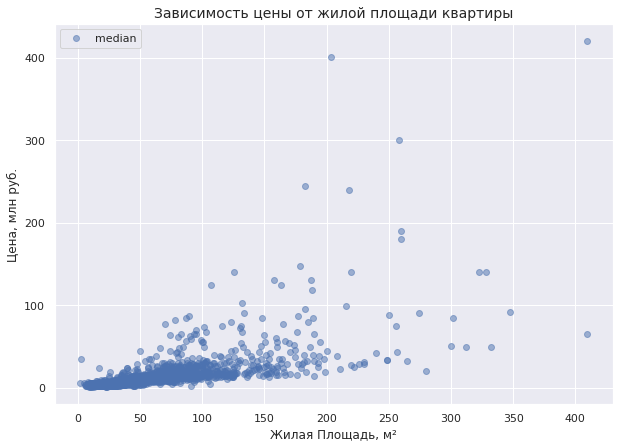

In [128]:
#зависимость цены от жилой площади
pivot_table_living_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']

pivot_table_living_area.plot(y = 'median', style = 'o', alpha = 0.5)
plt.title('Зависимость цены от жилой площади квартиры', size=14)
plt.xlabel('Жилая Площадь, м²')
plt.ylabel('Цена, млн руб.')

pivot_table_total_area.sort_values('median', ascending = False)
df['living_area'].corr(df['last_price'])


**Вывод:**  Имеется средне-положительная линейная зависимость - согласно Коэффициенту корреляции Пирсона - 0.55 = Но зависимость немного меньше чем от общей площади

0.5288994370014394

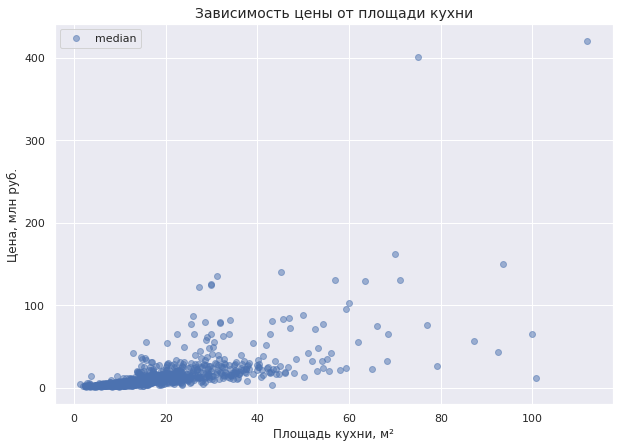

In [129]:
#зависимость цены от площади кухни
pivot_table_kitchen_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']

pivot_table_kitchen_area.plot(y = 'median', style = 'o', alpha = 0.5)
plt.title('Зависимость цены от площади кухни', size=14)
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена, млн руб.')

pivot_table_kitchen_area.sort_values('median', ascending = False)
df['kitchen_area'].corr(df['last_price'])


**Вывод:**  Имеется положительная линейная зависимость - согласно Коэффициенту корреляции Пирсона - 0.44 = Но скорее влияет что чем больше квартира тем больше кухня.

,mean,count,median
exp_weekday,,,
Вт,6.421910,4121,4.750
Ср,6.639075,3910,4.700
Чт,6.698496,4231,4.658
Пн,6.512279,3570,4.650
Пт,6.366971,3922,4.600
Сб,7.013376,1906,4.600
Вс,6.267006,1671,4.550


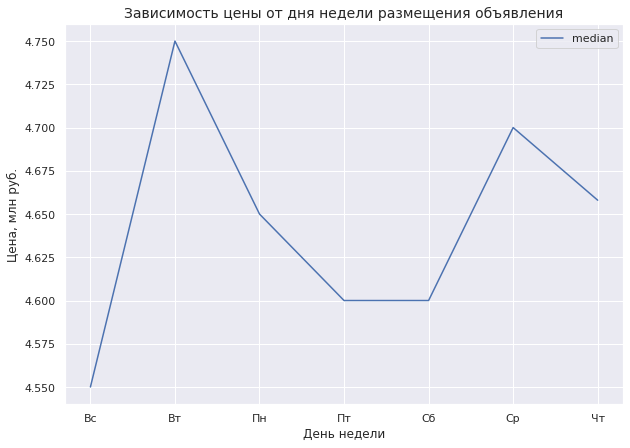

In [130]:
#зависимость цены от дня недели размещения объявления.
pivot_table_weekday_exposition = df.pivot_table(index = 'exp_weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
plt.title('Зависимость цены от дня недели размещения объявления', size=14)
plt.xlabel('День недели')
plt.ylabel('Цена, млн руб.')
pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод:**  во вторник и среду - цены выше, в пятницу-субботу яма, самые низкие в воскресенье. С чем связано сложно сказать, но возможно хотят быстро продать пока дома на выходных. Пики во вторник-среду = возможно стартуют с максимальной и потом понижают от спроса.

,mean,count,median
exp_month,,,
АПР,6.762313,2340,4.800000
СЕНТ,6.888343,1948,4.705142
ДЕК,7.050843,1621,4.700000
МАР,6.393088,2551,4.700000
НОЯ,6.478163,2326,4.700000
ИЮЛ,6.547520,1664,4.650000
ФЕВ,6.484247,2613,4.650000
АВГ,6.393888,1715,4.600000
ОКТ,6.194068,2087,4.600000


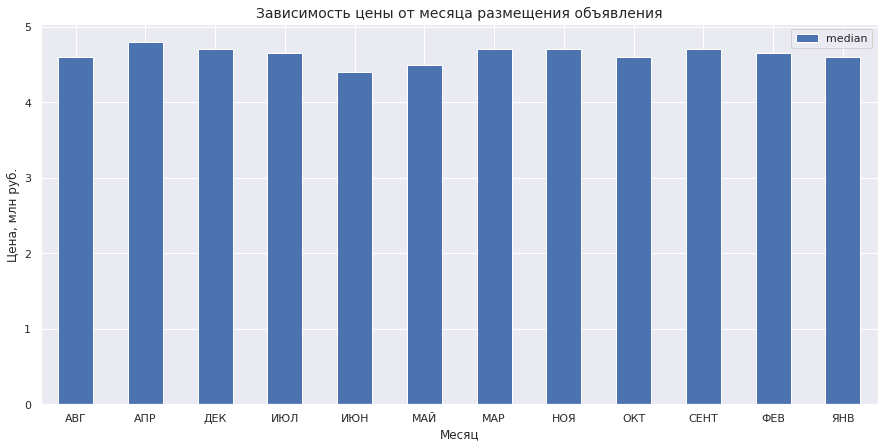

In [131]:
#зависимость цены от месяца размещения объявления.
pivot_table_month_exposition = df.pivot_table(index = 'exp_month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median', kind='bar', figsize=(15, 7), rot = 0)
plt.title('Зависимость цены от месяца размещения объявления', size=14)
plt.xlabel('Месяц')
plt.ylabel('Цена, млн руб.')
pivot_table_month_exposition.sort_values('median', ascending = False)

**Вывод:**  сильных колебаний нет, отличия связаны с сезонностью

,mean,count,median
exp_year,,,
2014,12.046600,136,7.640
2015,8.526263,1159,5.301
2019,6.804949,2847,5.100
2018,5.951566,8399,4.600
2016,6.835823,2740,4.550
2017,6.610341,8050,4.500


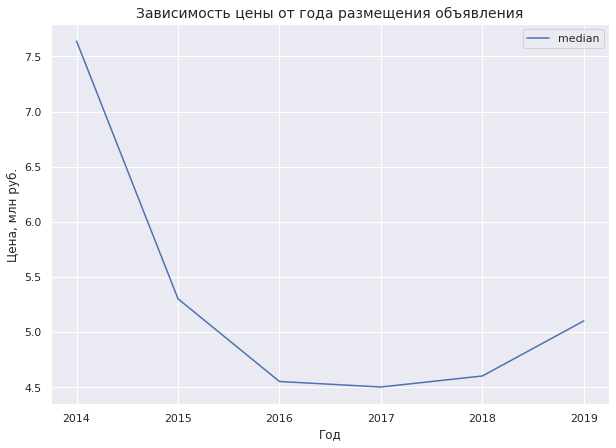

In [132]:
#зависимость цены от года размещения объявления.
pivot_table_year_exposition = df.pivot_table(index = 'exp_year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
plt.title('Зависимость цены от года размещения объявления', size=14)
plt.xlabel('Год')
plt.ylabel('Цена, млн руб.')
pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод:**   видим, что с 2014 до 2016 года цена падала, но далее начала расти. Возможно были кризисы по рынку, курс валют сильно менялся, КС ЦБ - ставки по ипотеке и т.п. Также возможно повлиял объем построенных новостроек в эти годы = предложение превышало спрос

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [133]:
data_cities = df.pivot_table(index = 'locality_name', values = ['price_per_meter'], aggfunc=['count', 'mean'])
data_cities.columns = ['count_of_entries', 'avg_price']
#Создаём список с 10 городами с наибольшим количеством объявлений
top10_cities = data_cities.sort_values('count_of_entries', ascending=False).head(10)

In [134]:
#Полученный список выводим, отсортировав по средней цене квадратного метра
top10_cities.sort_values('avg_price', ascending = False)

,count_of_entries,avg_price
locality_name,,
Санкт-Петербург,15515,114708.016242
Пушкин,369,103125.352304
деревня Кудрово,283,92296.731449
посёлок Парголово,323,90289.340557
посёлок Мурино,492,85089.162602
посёлок Шушары,435,78277.462069
Колпино,338,75424.144970
Гатчина,306,68757.215686
Всеволожск,392,68617.538265


**Вывод:** Из 10 городов с наибольшим количеством объявлений жильё дешевле всего в Выборге, и дороже всего в Санкт-Петербурге.

**Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города**

In [135]:
spb_data = df.query('locality_name == "Санкт-Петербург"')
spb_data = spb_data.reset_index(drop=True)

In [136]:
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')

In [137]:
spb_data

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest_groups,city_center_nearest_group,days_exposition_group,locality_unduplicated,price_per_meter,exp_weekday,exp_month,exp_year,floor_groups,cityCenters_nearest_km
0,0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,...,от 10001 до 50000,свыше 11000,неизвестно,Санкт-Петербург,120370,Чт,МАР,2019,другой этаж,16
1,2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,...,от 10001 до 50000,свыше 11000,свыше 180,Санкт-Петербург,92785,Чт,АВГ,2015,другой этаж,14
2,3,0,64.900,159.00,2015-07-24,3,2.65,14.0,82.72,9,...,от 10001 до 50000,от 3001 до 10000,свыше 180,Санкт-Петербург,408176,Пт,ИЮЛ,2015,другой этаж,7
3,4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,...,от 10001 до 50000,от 3001 до 10000,от 31 до 180,Санкт-Петербург,100000,Вт,ИЮН,2018,другой этаж,8
4,7,5,7.915,71.60,2019-04-18,2,2.65,24.0,37.25,22,...,от 10001 до 50000,свыше 11000,неизвестно,Санкт-Петербург,110544,Чт,АПР,2019,другой этаж,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,23689,13,3.550,35.30,2018-02-28,1,2.86,15.0,16.30,4,...,от 10001 до 50000,свыше 11000,до 30,Санкт-Петербург,100566,Ср,ФЕВ,2018,другой этаж,16
15511,23690,3,5.500,52.00,2018-07-19,2,2.65,5.0,31.00,2,...,от 10001 до 50000,от 3001 до 10000,до 30,Санкт-Петербург,105769,Чт,ИЮЛ,2018,другой этаж,6
15512,23691,11,9.470,72.90,2016-10-13,2,2.75,25.0,40.30,7,...,от 10001 до 50000,от 3001 до 10000,свыше 180,Санкт-Петербург,129903,Чт,ОКТ,2016,другой этаж,4
15513,23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.30,3,...,от 10001 до 50000,от 3001 до 10000,неизвестно,Санкт-Петербург,72490,Вт,МАР,2017,другой этаж,4


In [138]:
price_per_km = spb_data.groupby(['cityCenters_nearest_km'])[['last_price']].mean()

In [139]:
price_per_km

,last_price
cityCenters_nearest_km,
0,31.449116
1,21.274819
2,17.886620
3,11.169692
4,13.339079
5,14.323400
6,15.120958
7,14.597748
8,10.000382


Text(0.5, 1.0, 'Влияние расстояния от центра города на цены квартир')

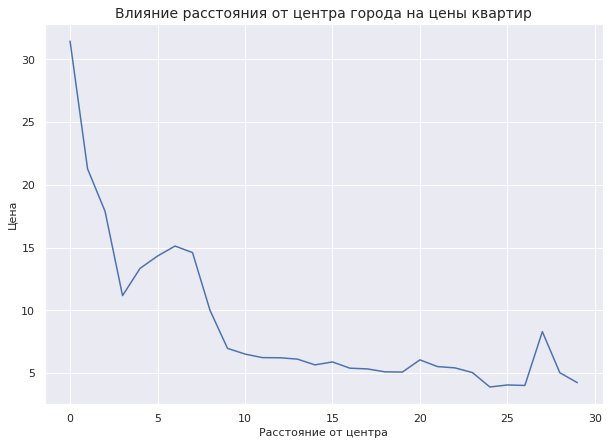

In [140]:
sns.lineplot(x=price_per_km.index, y=price_per_km['last_price'], )
plt.xlabel("Расстояние от центра", size=11)
plt.ylabel("Цена", size=11)
plt.title("Влияние расстояния от центра города на цены квартир", size=14)

In [141]:
spb_data['last_price'].corr(spb_data['cityCenters_nearest_km'])

-0.25720757714815984

**Вывод:** принимая во внимание данные price_per_km и графика:
* самый супер центр средняя цена 31,5 млн.руб, с 9 км уже не центр и квартиры в среднем в 4.5 раза дешевле
* выброс вниз на 3 км не будем принимать во внимание и примем центр за окружность с радиусом в  8 км
* чем дальше от центра - тем дешевле,идет относительное снижение цены до 27 км, там есть рост (возможно объекты элитного загородного поселка или аналог Рублевки) 
* к.Пирсона говорит что когда значения одной переменной убывают, значения другой возрастают. Это и показывает отрицательный коэффициент корреляции. Про такие переменные говорят, что они отрицательно коррелированы.

In [142]:
# Код проверки 27 км
spb_data.query('cityCenters_nearest_km == 27')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest_groups,city_center_nearest_group,days_exposition_group,locality_unduplicated,price_per_meter,exp_weekday,exp_month,exp_year,floor_groups,cityCenters_nearest_km
465,748,13,14.35,74.0,2017-11-28,2,3.13,5.0,30.0,3,...,от 10001 до 50000,свыше 11000,от 31 до 180,Санкт-Петербург,193918,Вт,НОЯ,2017,другой этаж,27
3913,5961,6,2.25,32.0,2018-02-27,1,2.65,2.0,16.5,2,...,от 10001 до 50000,свыше 11000,от 31 до 180,Санкт-Петербург,70312,Вт,ФЕВ,2018,последний этаж,27


### Общий вывод

**Вводные:**
Мы провели анализ представленного датасета данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
* Датасет для анализа содержал таблицу, состоящую 23699 строк и 22 столбца

**Предобработка данных:**
  Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.  
  
  Ввели новые данные - столбцы:
* Цена квадратного метра
* День недели, месяц и год публикации объявления
* Этаж квартиры
* Соотношение жилой и общей площади, а также отношение площади кухни к общей площади
* Расстояние от центра в км

**Результаты исследований:**
Изучили  параметры на наличие выбивающихся значений проанализировали выбросы и аномалии в параметрах.

* Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.
  Пик приходится ~ 45 кв.м.
* Распределение цен близко к нормальному и имеет вид перевернутого колокола с наибольшей концентрацией в районе около 4 млн. руб. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.
* Количество комнат колеблется от 1 до 19. Больше всего 1-2 комнатных квартир в продаже
* Высота потолков в среднем составляет 2,7 м, медиана 2,65 м.
* Больше всего в продаже квартир на 2 этаже, медиана 4, среднее 5-6 этаж. 
* Основная масса квартир ни первый не последний этаж, первый и последний этажи примерно одинаковую долю составляют.
* В основном продаются квартиры на 5 и 9 этажах.
* Более половины квартир более 11 км от центра, далее идут от 3 до 10 км, также существенную долю составляют объявления где расстояние не указано или нет данных
* Основная масса квартир от 10 до 50 км до аэропорта, у пятой части не указано расстояние
* Основная масса квартир в более чем 3 км от парка, 22% совсем рядом в 500 метрах
* День размещения обяъвлений - особой зависимости нет, в лидерах четверг, вторник, среду, пятницу и понедельник, на выходных меньше видимо отдыхают, и деловые вопроы переносят на будние
* Месяц размещения обяъвлений - особой зависимости нет, февраль, март, апрель и ноябрь в небольшом отрыве
* Срок продажи: судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 181 день, а медиана - 96 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 7,30,45, 60, 90 днях - это наиболее популярное количество дней до снятия объявления.
  Основная проблема - можно ли считать снятие объявления - продажей т.к. у размещения есть сроки публикации:
  - до 4,5 млн — 45 дней
  - от 4,5 до 10 млн — 60 дней
  - от 10 млн — 90 дней
  В эти сроки объявлени могли простоя сняться автоматом и по факту продажи не было. Но информации по этому поводу нет, поэтому нужно запросить доп.инфо у авторов датасета/
  Нормальные сроки продажи = На среднее время значительно повлияли выбросы, поэтому обычным временем продажи можно считать медианное значение, либо диапазон от 25% до 75% - 45-231 день.
  Верхний "ус" - 512 дней, всё что больше - можно считать аномально большим сроком продажи.
  Сверхмалые сроки = в данном случае учитывается время, которое объявление провисело на сайте, и факт продажи не подтверждается. Тогда вполне вероятно, что покупатель может найтись за 1-3 дня. Но скорее всего, человек, разместивший объявление, по каким-то причинам передумал либо снял объявление для последующей доработки.
  Полноценная же продажа кваритры с оформлением всех необходимых документов за один день невозможна - необходимы доп.данные.
  
  **Зависимость цены**:
  * Зависимость цены  от общей площади квартиры: Имеется средне-положительная линейная зависимость - Коэффициенту корреляции Пирсона - 0.65 = То есть, чем больше площадь, тем выше стоимость.
  * Зависимость цены от числа комнат: чем больше комнат, тем дороже, но Коэффициент корреляции Пирсона = 0,36 зависимость не очень сильная, хотя на графике существенная, видимо существенно влияют иные факторы (элитность, клубный дом, место, центр и т.п.)
  * Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой): на первом этаже самые дешевые квартиры, на первом дешевле чем на последнем если сравнить только с ним/ большинство квартир в выборке не на 1 и не на последнем с самой высокой медианной ценой, средняя самая высокая цена на квартиры на последнем этаже (пентхаусы предполагаю)
  * Зависимость цены от жилой площади: Имеется средне-положительная линейная зависимость - согласно Коэффициенту корреляции Пирсона - 0.55 = Но зависимость немного меньше чем от общей площади
  * Зависимость цены от площади кухни: Имеется положительная линейная зависимость - согласно Коэффициенту корреляции Пирсона - 0.44 = Но скорее влияет что чем больше квартира (больше площадь - больше цена) тем и кухня больше.
  * Зависимость цены от дня недели размещения объявления: во вторник и среду - цены выше, в пятницу-субботу яма, самые низкие в воскресенье. С чем связано сложно сказать, но возможно хотят быстро продать пока дома на выходных. Пики во вторник-среду = возможно стартуют с максимальной и потом понижают от спроса.
  * Зависимость цены от месяца размещения объявления: сильных колебаний нет, отличия связаны с сезонностью.
  * Зависимость цены от года размещения объявления: с 2014 до 2016 года цена падала, но далее начала расти. Возможно были кризисы по рынку, курс валют сильно менялся, КС ЦБ - ставки по ипотеке и т.п. Также возможно повлиял объем построенных новостроек в эти годы = предложение превышало спрос.
  
  **Из 10 городов с наибольшим количеством объявлений жильё дешевле всего в Выборге (средняя цена 58 тыс.руб за квадрат), и дороже всего в Санкт-Петербурге (средняя цена 114 тыс.руб за квадрат)**
  
  **Санкт-Петербург**
  * самый супер центр средняя цена 31,5 млн.руб, с 9 км уже не центр и квартиры в среднем в 4.5 раза дешевле
  * выброс вниз на 3 км не будем принимать во внимание и примем центр СПБ за окружность с радиусом в 8 км
  * чем дальше от центра - тем дешевле,идет относительное снижение цены до 27 км, там есть рост (возможно объекты элитного загородного поселка или аналог Рублевки)
  * к.Пирсона говорит что когда значения одной переменной убывают, значения другой возрастают. Это и показывает отрицательный коэффициент корреляции. Про такие переменные говорят, что они отрицательно коррелированы.
  
  
  

Рекомендации сервису:
* Для более точной работы системы определения цен будет важно учитывать специфику населённых пунктов и областей, в которых размещаются объявления.
* Выделить жилье с экстремально высокими потолками 5+ в отд. группу пентхаус или хайфлэты
* Рассмотреть целесообразность использования дублирующих групп, например parks_nearest и parks3000/ как вариант - парк рядом - да, нет (аналогично пруды)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод